<a href="https://colab.research.google.com/github/peisuke/generative_ai_notebooks/blob/main/16_waifu_diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# パッケージのインストール
!pip install --upgrade diffusers[torch] transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 109.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 36.2 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
      Successfully uninstalled transformers-4.35.2


In [2]:
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler
import torch

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [3]:
scheduler = EulerDiscreteScheduler.from_pretrained(
    "waifu-diffusion/wd-1-5-beta",
    subfolder="scheduler"
)
pipe = StableDiffusionPipeline.from_pretrained(
    "waifu-diffusion/wd-1-5-beta",
    scheduler=scheduler,
    torch_dtype=torch.float16
).to("cuda")
pipe.enable_attention_slicing()

scheduler/scheduler_config.json:   0%|          | 0.00/346 [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/579 [00:00<?, ?B/s]

Fetching 14 files:   0%|          | 0/14 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/861 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/520 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.89k [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.16k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/622 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


In [8]:
# テキストからの画像生成
# https://self-development.info/%E3%80%90stable-diffusion%E3%80%91waifu-diffusion-1-5%E3%81%AE%E5%88%A9%E7%94%A8%E6%96%B9%E6%B3%95/のプロンプトを利用しています
prompt = "1girl, green hair, sweater, looking at viewer, upper body, beanie, outdoors, watercolor, night, turtleneck,(waifu, anime, exceptional, best aesthetic, new, newest, best quality, masterpiece, extremely detailed:1.2)"
negative_prompt = "((bad hands)), ((mutated hands and fingers)), ((bad feet)), lowres, text, blurry, (ugly), logo, cropped, worst quality, jpeg, ((jpeg artifacts)), deleted, old, oldest, ((censored)), ((bad aesthetic)), (mosaic censoring, bar censor, blur censor), twitter username, watermark, low quality"

image = pipe(prompt, negative_prompt=negative_prompt, height=768, width=768).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

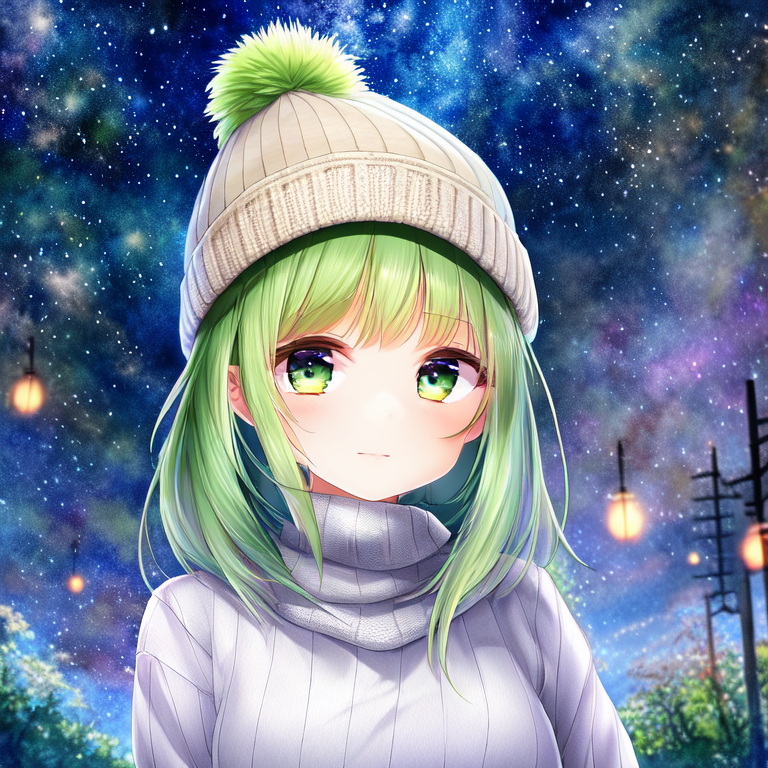

In [9]:
image